<a href="https://colab.research.google.com/github/jofmorenore/TS_Climatic/blob/main/clusterRFbasins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://stackoverflow.com/questions/74283327/conversion-py2rpy-not-defined-for-objects-of-type-class-str
!pip install rpy2==3.5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
%load_ext rpy2.ipython

In [3]:
%%R
getwd()

[1] "/content"


In [4]:
%%R
sessionInfo()

R version 4.2.2 Patched (2022-11-10 r83330)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 20.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/liblapack.so.3

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] tools     stats     graphics  grDevices utils     datasets  methods  
[8] base     

loaded via a namespace (and not attached):
[1] compiler_4.2.2


# Librerías

In [5]:
%%R
pkgs = c("sf", "tidyverse", "rgeos", "gtools", "rnaturalearthdata", "rnaturalearth", "cclust", "fs", "extrafont", "Hmisc",
         "showtext", "colourpicker", "dismo", "multcomp", "glue", "exactextractr", "geodata", "ggspatial", "randomForest")

row.names(installed.packages())[row.names(installed.packages()) %in% pkgs]

 [1] "cclust"            "colourpicker"      "dismo"            
 [4] "exactextractr"     "extrafont"         "geodata"          
 [7] "ggspatial"         "gtools"            "Hmisc"            
[10] "multcomp"          "randomForest"      "rgeos"            
[13] "rnaturalearth"     "rnaturalearthdata" "sf"               
[16] "showtext"          "fs"                "glue"             
[19] "tidyverse"        


In [ ]:
%%R
library(fs)
library(glue)
library(tidyverse)

In [7]:
%%R
if("sf" %in% row.names(installed.packages())==FALSE){suppressMessages(install.packages("sf"))}
if("rgeos" %in% row.names(installed.packages())==FALSE){suppressMessages(install.packages("rgeos"))}
if("gtools" %in% row.names(installed.packages())==FALSE){suppressMessages(install.packages("gtools")) }
if("rnaturalearthdata" %in% row.names(installed.packages())==FALSE){suppressMessages(install.packages("rnaturalearthdata")) }
if("rnaturalearth" %in% row.names(installed.packages())==FALSE){suppressMessages(install.packages("rnaturalearth")) }
if("cclust" %in% row.names(installed.packages())==FALSE){suppressMessages(install.packages("cclust"))}
if("extrafont" %in% row.names(installed.packages())==FALSE){ suppressMessages(install.packages("extrafont")) }
if("Hmisc" %in% row.names(installed.packages())==FALSE){ suppressMessages(install.packages("Hmisc"))}
if("showtext" %in% row.names(installed.packages())==FALSE){suppressMessages(install.packages("showtext"))}
if("colourpicker" %in% row.names(installed.packages())==FALSE){suppressMessages(install.packages("colourpicker"))}
if("dismo" %in% row.names(installed.packages())==FALSE){suppressMessages(install.packages("dismo"))}
if("multcomp" %in% row.names(installed.packages())==FALSE){suppressMessages(install.packages("multcomp"))}
if("exactextractr" %in% row.names(installed.packages())==FALSE){suppressMessages(install.packages("exactextractr"))}
if("geodata" %in% row.names(installed.packages())==FALSE){suppressMessages(install.packages("geodata"))}
if("ggspatial" %in% row.names(installed.packages())==FALSE){suppressMessages(install.packages("ggspatial"))}
if("randomForest" %in% row.names(installed.packages())==FALSE){suppressMessages(install.packages("randomForest"))}

In [8]:
%%R
library(colourpicker)

In [9]:
%%R
library(cclust)

In [ ]:
%%R
library(dismo)

In [11]:
%%R
library(exactextractr)

In [ ]:
%%R
library(extrafont)

In [13]:
%%R
library(fs)

In [ ]:
%%R
library(geodata)

In [15]:
%%R
library(ggspatial)

In [16]:
%%R
library(gtools)

In [ ]:
%%R
library(Hmisc)

In [ ]:
%%R
library(multcomp)

In [ ]:
%%R
library(randomForest)

In [ ]:
%%R
library(rgeos)

In [21]:
%%R
library(rnaturalearth)

In [ ]:
%%R
library(rnaturalearthdata)

In [ ]:
%%R
library(sf)

In [ ]:
%%R
library(showtext)

In [25]:
%%R
library(tidyverse)

# Script

In [26]:
%%R
source('https://raw.githubusercontent.com/fabiolexcastro/clusterRFbasins/master/functionsRF.R')

In [ ]:
%%R
install.packages("remotes")

In [ ]:
%%R
library(remotes)
remotes::install_version("Rttf2pt1", version = "1.3.8")

In [ ]:
%%R
# https://stackoverflow.com/questions/61204259/how-can-i-resolve-the-no-font-name-issue-when-importing-fonts-into-r-using-ext
library(extrafont)
library(remotes)
remotes::install_version("Rttf2pt1", version = "1.3.12")
library(Rttf2pt1)
extrafont::font_import()

In [30]:
%%R
sessionInfo()

R version 4.2.2 Patched (2022-11-10 r83330)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 20.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/liblapack.so.3

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] tools     stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] Rttf2pt1_1.3.12         remotes_2.4.2           cluster_2.1.4          
 [4] showtext_0.9-5          showtextdb_3.0          sysfonts_0.8.8         
 [7] sf_1.0-12               rnaturalearthdata_0.1.0 rnaturalearth_0.3.

In [31]:
%%R
installed.packages()[row.names(installed.packages()) %in% "Rttf2pt1",]

                        Package                         LibPath 
                     "Rttf2pt1" "/usr/local/lib/R/site-library" 
                        Version                        Priority 
                       "1.3.12"                              NA 
                        Depends                         Imports 
                  "R (>= 2.15)"                              NA 
                      LinkingTo                        Suggests 
                             NA                              NA 
                       Enhances                         License 
                             NA                  "file LICENSE" 
                License_is_FOSS           License_restricts_use 
                          "yes"                              NA 
                        OS_type                          MD5sum 
                             NA                              NA 
               NeedsCompilation                           Built 
                         

In [32]:
%%R
require(extrafont)
require(Rttf2pt1)

In [33]:
%%R
# Load data ---------------------------------------------------------------
#bsns <- st_read('gpkg/basins_col.gpkg')
bsns <- st_read('/content/gpkg/basins_col.gpkg')
bsns <- st_transform(bsns, crs = st_crs(4326))

Reading layer `basins_col' from data source `/content/gpkg/basins_col.gpkg' using driver `GPKG'
Simple feature collection with 310 features and 12 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 450701.5 ymin: 22962 xmax: 1806816 ymax: 1870633
Projected CRS: MAGNA-SIRGAS / Colombia Bogota zone


In [34]:
%%R
# Download ----------------------------------------------------------------
prec <- worldclim_country(country = 'COL', var = 'prec', path = 'tmpr')
tmax <- worldclim_country(country = 'COL', var = 'tmax', path = 'tmpr')
tavg <- worldclim_country(country = 'COL', var = 'tavg', path = 'tmpr')
tmin <- worldclim_country(country = 'COL', var = 'tmin', path = 'tmpr')

In [35]:
%%R
# Masking and cropping ----------------------------------------------------
prec <- terra::crop(prec, vect(bsns)) %>% terra::mask(., vect(bsns))
tmax <- terra::crop(tmax, vect(bsns)) %>% terra::mask(., vect(bsns))
tavg <- terra::crop(tavg, vect(bsns)) %>% terra::mask(., vect(bsns))
tmin <- terra::crop(tmin, vect(bsns)) %>% terra::mask(., vect(bsns))

names(prec) <- glue('prec_{1:12}')
names(tmax) <- glue('tmax_{1:12}')
names(tavg) <- glue('tavg_{1:12}')
names(tmin) <- glue('tmin_{1:12}')

In [36]:
%%R
# To calculate the bioclim ------------------------------------------------
bioc <- dismo::biovars(prec = stack(prec), tmin = stack(tmin), tmax = stack(tmax))
names(bioc) <- glue('bioc_{1:19}')

#raster::writeRaster(x = bioc, filename = glue('/content/tif/bioc.tif'), overwrite = T)

In [37]:
%%R
# To calculate the zonal --------------------------------------------------
bioc_znal <- exact_extract(bioc, bsns, 'mean') %>% as_tibble()
colnames(bioc_znal) <- gsub('mean.', '', colnames(bioc_znal))

  |======================================================================| 100%


In [38]:
%%R
# Join the two tables -----------------------------------------------------
tble <- bsns %>% st_drop_geometry %>% dplyr::select(NOMAH, NOMZH, NOMSZH) %>% as_tibble() %>% cbind(., bioc_znal) %>% as_tibble()

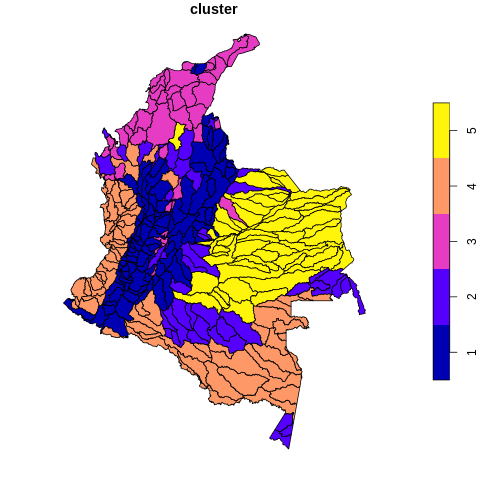

In [39]:
%%R
# Cluster using Random Forest ---------------------------------------------
mtrx <- tble[,4:ncol(tble)]
nfrs <- 50
ntrs <- 500
rfds <- RFdist(mtrx, mtry1 = 9, ntrs, nfrs, addcl1 = T, addcl2 = F, imp = T, oob.prox1 = T)
lbrf <- pamNew(rfds$cl1, 5)

bsns <- mutate(bsns, cluster = lbrf)
plot(dplyr::select(bsns, cluster))

tble <- mutate(tble, cluster = lbrf)
tble <- mutate(tble, cluster = factor(cluster, levels = as.character(1:5)))
#write.csv(tble, '/content/tble/cluterBasins.csv', row.names = F)

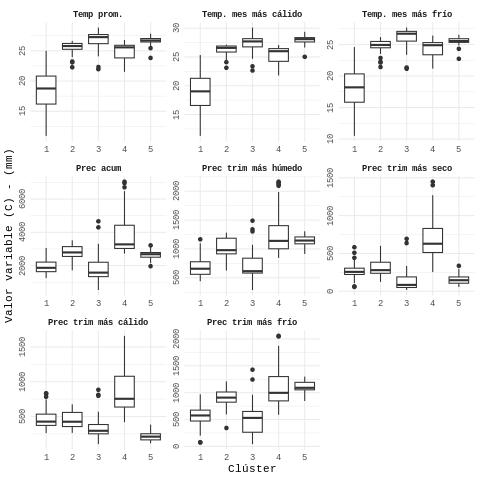

In [40]:
%%R
# To make a boxplot -------------------------------------------------------
mtrx <- dplyr::select(tble, cluster, bioc_1:bioc_19)
mtrx <- gather(mtrx, variable, value, -cluster)
mtrx <- filter(mtrx, variable %in% c('bioc_1', 'bioc_10', 'bioc_11', 'bioc_12', 'bioc_16', 'bioc_17', 'bioc_18', 'bioc_19'))

lbls <- tibble(variable = c('bioc_1', 'bioc_10',  'bioc_11', 'bioc_12', 'bioc_16', 'bioc_17', 'bioc_18', 'bioc_19'), 
               nombre = c('Temp prom.', 'Temp. mes más cálido', 'Temp. mes más frío', 'Prec acum', 'Prec trim más húmedo', 'Prec trim más seco', 'Prec trim más cálido', 'Prec trim más frío'))

mtrx <- inner_join(mtrx, lbls, by = 'variable')
mtrx <- mutate(mtrx, nombre = factor(nombre, levels = c('Temp prom.', 'Temp. mes más cálido', 'Temp. mes más frío', 'Prec acum', 'Prec trim más húmedo', 'Prec trim más seco', 'Prec trim más cálido', 'Prec trim más frío')))

#windowsFonts(Abadi = windowsFont('Abadi'))
#windowsFonts(georg = windowsFont('Georgia'))

gbox <- ggplot(data = mtrx, aes(x = cluster, y = value)) + 
  geom_boxplot() + 
  facet_wrap(~nombre, scales = 'free') + 
  labs(x = 'Clúster', y = 'Valor variable (C) - (mm)') +
  theme_minimal() + 
  theme(text = element_text(family = 'georg'),
        strip.text.x = element_text(face = 'bold'), 
        axis.text.y = element_text(angle = 90, hjust = 0.5))

ggplot2::ggsave(plot = gbox, filename = '/content/png/graphs/boxplot.png', units = 'in', width = 9, height = 7, dpi = 300)
gbox

In [ ]:
%%R
# Clustering --------------------------------------------------------------
clss <- tibble(
  type = glue('cluster {1:5}'),
  cluster = 1:5,
  class = c('Muy frío - Seco', 'Frío - Seco', 'Muy cálido - Templado', 'Cálido - Húmedo', 'Muy cálido - Húmedo')
)

clss <- mutate(clss, cluster = factor(cluster, levels = as.character(1:5)))
mtrx <- inner_join(mtrx, clss, by = 'cluster')

colourWidget()

clrs <- c('#53805E', '#B57A36', '#37B896', '#515D8C', '#1F6ABF')
mtrx <- mutate(mtrx, class = factor(class, levels = clss$class))

gbox <- ggplot(data = mtrx, aes(x = cluster, y = value, fill = class)) + 
  geom_boxplot(color = 'grey40', size = 0.1, weight = 0.01) + 
  scale_fill_manual(values = clrs) +
  facet_wrap(~nombre, scales = 'free') + 
  labs(x = 'Clúster', y = 'Valor variable (C) - (mm)', fill = 'Clúster', caption = 'Clústers realizados a partir de la técnica Random Forest\nElaborado por Fabio Castro-Llanos') +
  theme_minimal() + 
  ggtitle(label = 'Clusters climáticos para las cuencas hidrográficas en Colombia') +
  theme(text = element_text(family = 'georg', color = 'grey50'),
        strip.text.x = element_text(face = 'bold', color = 'grey50'),
        plot.title = element_text(face = 'bold', color = 'grey30', hjust = 0.5),
        axis.title = element_text(face = 'bold'),
        axis.title.x = element_blank(),
        legend.title = element_text(face = 'bold'),
        plot.caption = element_text(hjust = 0.5, color = 'grey60'),
        legend.position = c(0.83, 0.15),
        axis.text.y = element_text(angle = 90, hjust = 0.5)) +
  guides(
    fill = guide_legend(
          direction = "vertical",
          title.position = 'top',
          title.hjust = 0.5,
          label.hjust = 0,
          nrow = 5,
          byrow = T,
          reverse = F)
    )

ggplot2::ggsave(plot = gbox, filename = '/content/png/graphs/boxplot.png', device = 'png', units = 'in', width = 9, height = 7, dpi = 300)
gbox

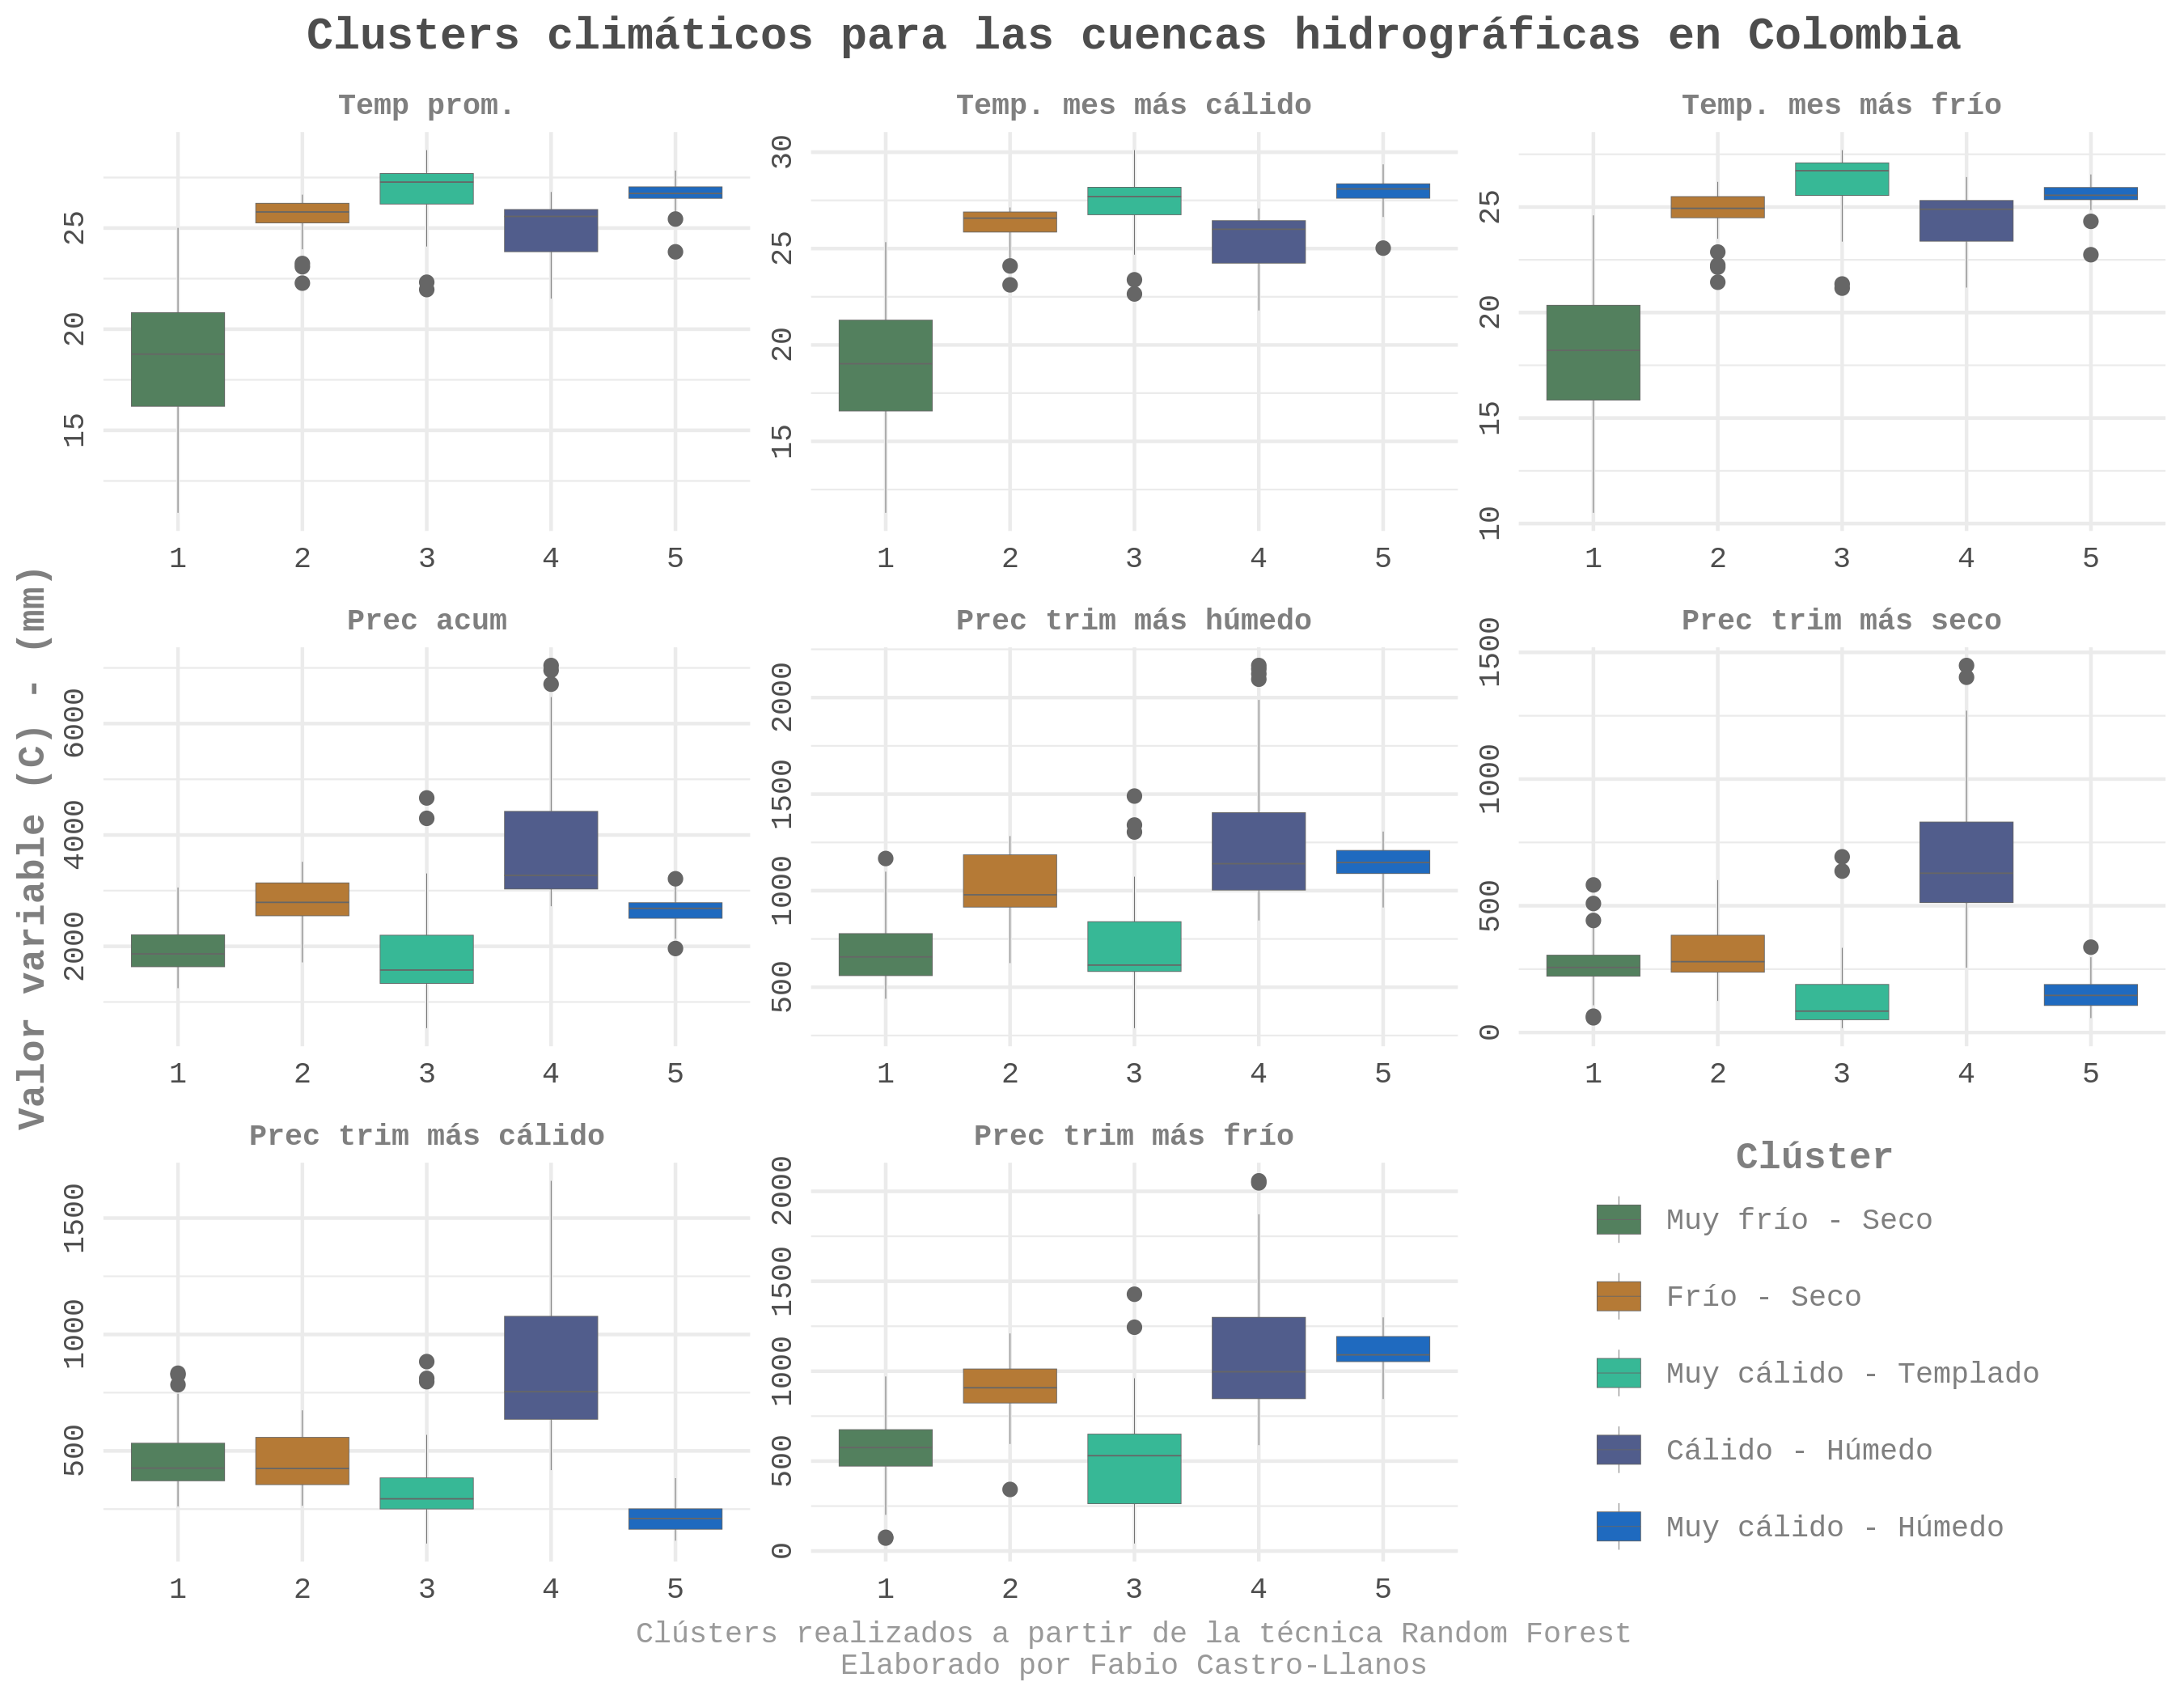

In [43]:
%%R
# To make the map ---------------------------------------------------------
bsns <- mutate(bsns, cluster = factor(cluster, levels = as.character(1:5)))
bsns <- inner_join(bsns, clss, by = 'cluster')
bsns <- mutate(bsns, class = factor(class, levels = clss$class))
#st_write(bsns, 'gpkg/basins_col_cluster.gpkg')

wrld <- ne_countries(returnclass = 'sf', scale = 50)

gmap <- ggplot() + 
  geom_sf(data = bsns, aes(fill = class), col = 'grey70', lwd = 0.00001) + 
  scale_fill_manual(values = clrs) + 
  geom_sf(data = wrld, fill = NA, col = 'grey70', lwd = 0.2) +
  labs(x = 'Lon', y = 'Lat', fill = 'Clúster', caption = 'Adaptado de IDEAM / Worldclim y uso de Random Forest\nElaborado por Fabio Castro-Llanos') +
  coord_sf(xlim = ext(bsns)[1:2], ylim = ext(bsns)[3:4]) + 
  ggtitle(label = 'Clústerización con Random Forest\npara las cuencas hidrográficas según el clima') +
  theme_minimal() + 
  theme(plot.title = element_text(face = 'bold', hjust = 0.5, color = 'grey50'),
        plot.subtitle = element_text(color = 'grey50', hjust = 0.5, vjust = 0),
        axis.title = element_text(face = 'bold'),
        legend.position = c(0.18, 0.135),
        legend.background = element_rect(fill = 'white', color = NA),
        legend.key = element_blank(),
        text = element_text(family = 'georg', color = 'grey50'),
        axis.text.y = element_text(hjust = 0.5, angle = 90, size = 6),
        plot.caption = element_text(hjust = 0.5),
        axis.text.x = element_text(size = 6)) +
  # opts(legend.background = theme_rect(col = 0)) +
  annotation_scale(location =  "br", width_hint = 0.5, text_family = 'georg', text_col = 'grey60', bar_cols = c('grey60', 'grey99'), line_width = 0.2) +
  annotation_north_arrow(location = "tl", which_north = "true", 
                         pad_x = unit(0.1, "in"), pad_y = unit(0.2, "in"), 
                         style = north_arrow_fancy_orienteering(text_family = 'georg', text_col = 'grey40', line_col = 'grey60', fill = c('grey60', 'grey99'))) 

ggsave(plot = gmap, filename = '/content/png/maps/basins_cluster.png', units = 'in', width = 7, height = 9, dpi = 300)
gmap

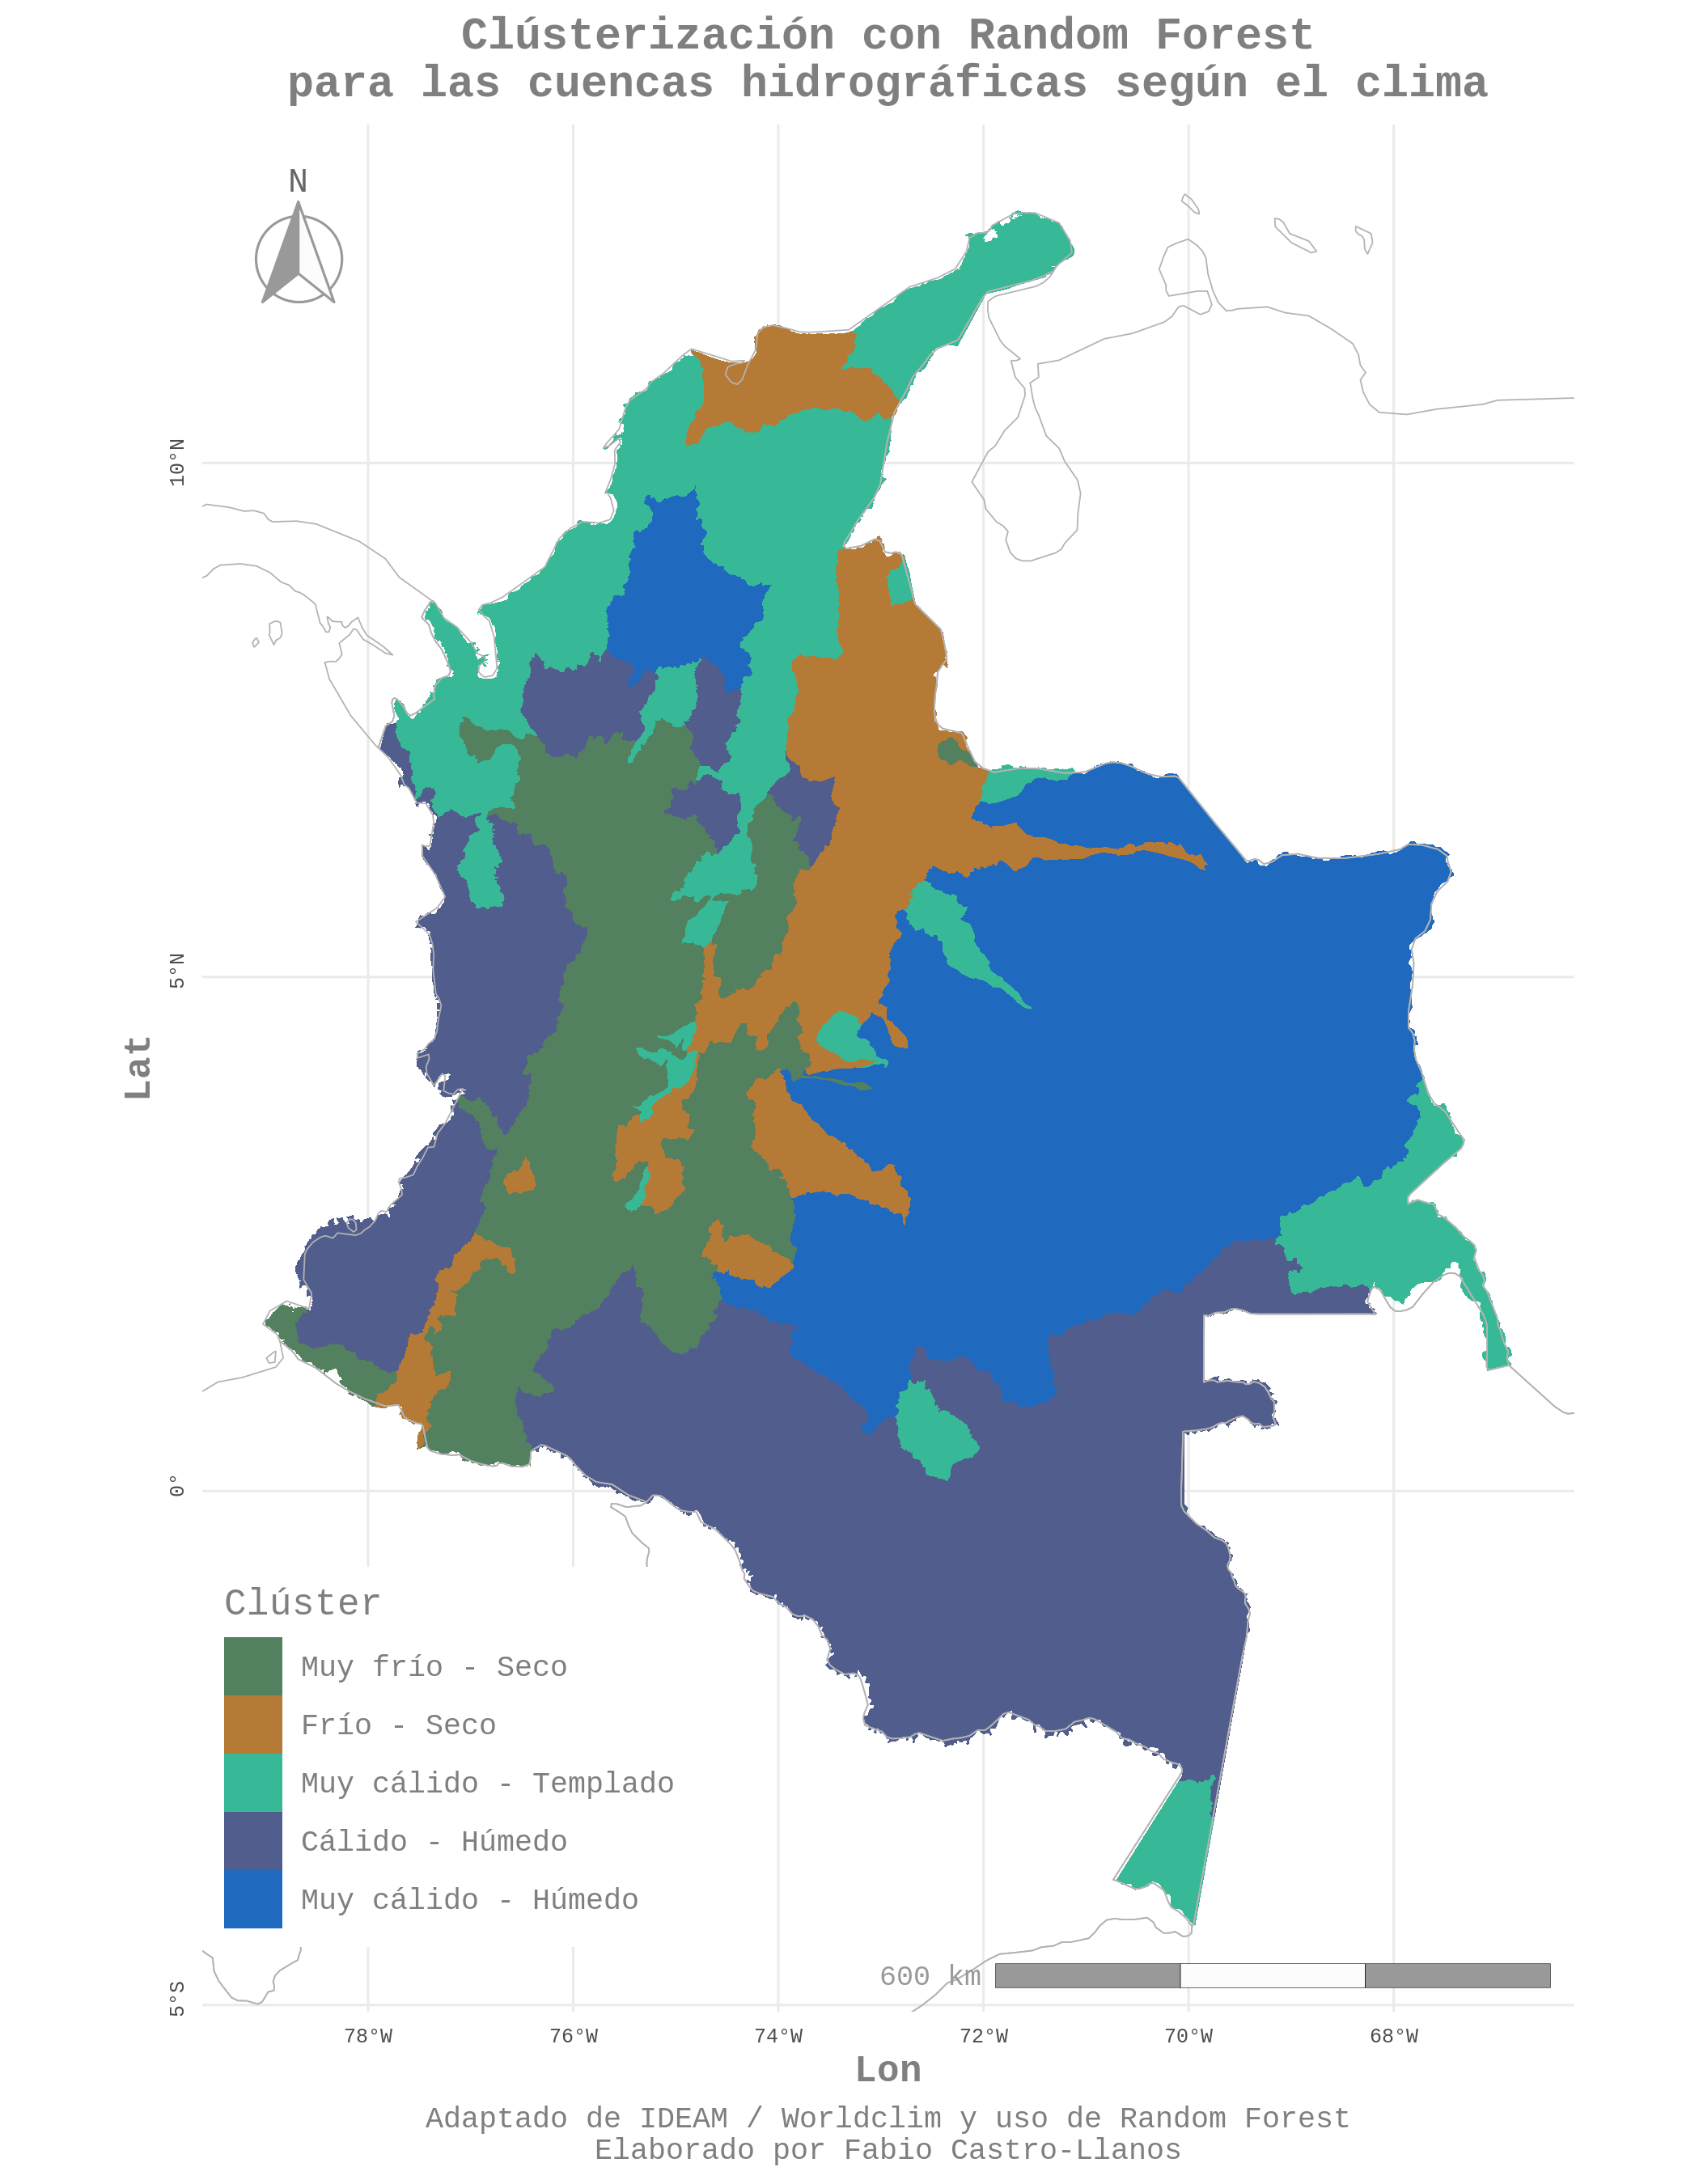